<p><b><u>Author:</p></b></u> Hadiya Murad Hadi
<p><b><u>Date:</p></b></u> 06/02/25

###**Importing the Libraries**
---


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection  import train_test_split

***Data Loading and Exploration***
---

In [ ]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Removing null values from the dataset

In [ ]:
df.dropna()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe


In [ ]:
recovered = df['Recovered'].value_counts()[0]
print(recovered)

16659


there were 16659 patients who survived COVID

In [ ]:
deaths = df['Deaths'].value_counts()[0]
print(deaths)

20167


there were 20167 patients who died because of COVID

In [ ]:
confirmed = df['Confirmed'].value_counts()[0]
print(confirmed)

10059


Confirmed Cases according to this dataset were 10059

#<b><u>Data Visualization + Preprocessing
---


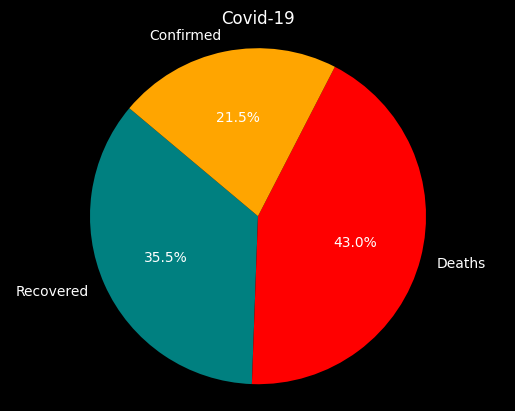

In [ ]:
labels = ['Recovered', 'Deaths', 'Confirmed']
sizes = [recovered, deaths, confirmed]
colors = ['teal', 'red', 'orange']
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 140, colors=colors )
plt.style.use('dark_background')
plt.axis('equal')
plt.title('Covid-19')
plt.show()

In [ ]:
country_name = 'Pakistan'
filtered_df = df[df['Country/Region'] == country_name]
filtered_df = filtered_df[['Country/Region', 'Confirmed','Deaths', 'Recovered']]
print(filtered_df)

      Country/Region  Confirmed  Deaths  Recovered
175         Pakistan          0       0          0
436         Pakistan          0       0          0
697         Pakistan          0       0          0
958         Pakistan          0       0          0
1219        Pakistan          0       0          0
...              ...        ...     ...        ...
47938       Pakistan     270400    5763     219783
48199       Pakistan     271887    5787     236596
48460       Pakistan     273113    5822     237434
48721       Pakistan     273113    5822     237434
48982       Pakistan     274289    5842     241026

[188 rows x 4 columns]


In [ ]:
pak_deaths = filtered_df['Deaths'].value_counts()[0]
print(pak_deaths)

56


In [ ]:
pak_recovered  = filtered_df['Recovered'].value_counts()[0]
print(pak_recovered)

45


In [ ]:
pak_confirmed = filtered_df['Confirmed'].value_counts()[0]
print(pak_confirmed)

34


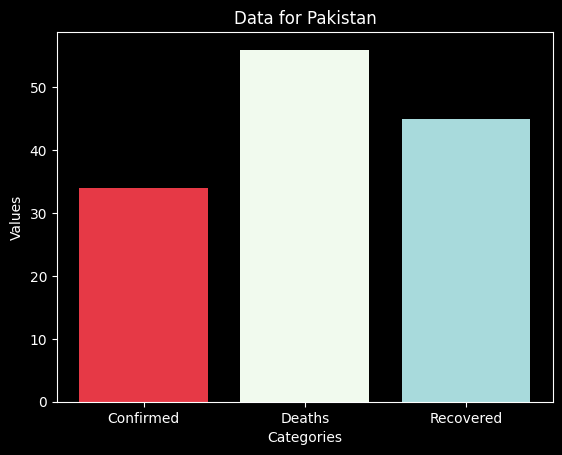

In [ ]:
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [pak_confirmed , pak_deaths, pak_recovered]
plt.bar(categories, values , color = ["#E63946", "#F1FAEE", "#A8DADC"])
plt.style.use("dark_background")
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Data for Pakistan')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model.get_params())  # Check if model initializes correctly


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


***Feature Engineering & Machine Learning***
---
---

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1



=== Loading Data ===
Successfully loaded data with shape: (1000, 10)

=== Analyzing Data ===
Dataset Shape: (1000, 10)

Missing Values:
Province/State: 699 missing values
Country/Region: 0 missing values
Lat: 0 missing values
Long: 0 missing values
Date: 0 missing values
Confirmed: 0 missing values
Deaths: 0 missing values
Recovered: 0 missing values
Active: 0 missing values
WHO Region: 0 missing values

Data Types:
Province/State: object
Country/Region: object
Lat: float64
Long: float64
Date: object
Confirmed: int64
Deaths: int64
Recovered: int64
Active: int64
WHO Region: object

Summary Statistics for Numeric Columns:
               Lat         Long    Confirmed       Deaths    Recovered  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     21.689905    24.736967     3.580000     0.103000     0.133000   
std      24.870090    70.601619    36.086588     1.658657     1.887027   
min     -51.796300  -135.000000     0.000000     0.000000     0.000000   
2

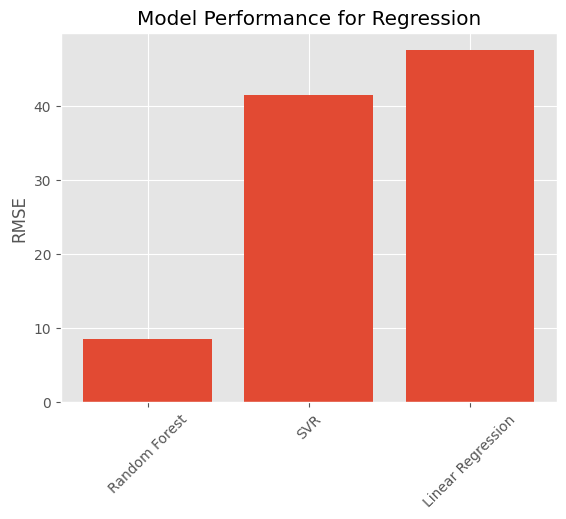

Visualizations generated successfully


In [ ]:
import pandas as pd
import numpy as np
from typing import Tuple, Dict, Any
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

def load_data(data_path: str) -> pd.DataFrame:
    """Load data from various file formats."""
    print("\n=== Loading Data ===")
    try:
        if data_path.endswith('.csv'):
            df = pd.read_csv(data_path, encoding='ISO-8859-1')
            df = df.head(1000)  # Optional, remove if you don't want to limit the data
        elif data_path.endswith('.xlsx'):
            df = pd.read_excel(data_path)
        elif data_path.endswith('.json'):
            df = pd.read_json(data_path)
        else:
            raise ValueError("Unsupported file format")

        print(f"Successfully loaded data with shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

def analyze_data(df: pd.DataFrame) -> None:
    """Perform initial data analysis."""
    print("\n=== Analyzing Data ===")
    try:
        analysis = {
            'shape': df.shape,
            'dtypes': df.dtypes.to_dict(),
            'missing_values': df.isnull().sum().to_dict(),
            'summary_stats': df.describe()
        }

        print(f"Dataset Shape: {analysis['shape']}")
        print("\nMissing Values:")
        for col, count in analysis['missing_values'].items():
            print(f"{col}: {count} missing values")

        print("\nData Types:")
        for col, dtype in analysis['dtypes'].items():
            print(f"{col}: {dtype}")

        print("\nSummary Statistics for Numeric Columns:")
        print(analysis['summary_stats'])

    except Exception as e:
        print(f"Error in data analysis: {str(e)}")
        raise

def identify_problem_type(target_series: pd.Series) -> str:
    """Identify whether it's a classification or regression problem."""
    print("\n=== Identifying Problem Type ===")
    try:
        unique_values = target_series.nunique()
        if target_series.dtype in ['object', 'category'] or unique_values < 10:
            problem_type = 'classification'
        else:
            problem_type = 'regression'

        print(f"Identified problem type: {problem_type}")
        print(f"Number of unique values in target: {unique_values}")
        if problem_type == 'classification':
            print("Class distribution:")
            print(target_series.value_counts(normalize=True))

        return problem_type
    except Exception as e:
        print(f"Error identifying problem type: {str(e)}")
        raise

def preprocess_data(df: pd.DataFrame, target_column: str) -> Tuple[np.ndarray, np.ndarray]:
    """Preprocess the data including handling missing values and encoding."""
    print("\n=== Preprocessing Data ===")
    try:
        # Separate features and target
        X = df.drop(columns=[target_column])
        y = df[target_column]

        # Handle missing values in the target using KNNImputer
        if y.isnull().sum() > 0:
            print(f"Imputing missing values in the target column using KNNImputer...")
            # KNN imputation for the target variable
            knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors
            y = knn_imputer.fit_transform(y.values.reshape(-1, 1)).flatten()
            print(f"Imputed missing values in target column using KNNImputer.")

        print("Handling missing values in features...")
        # Handle missing values in features
        numeric_imputer = SimpleImputer(strategy='mean')
        categorical_imputer = SimpleImputer(strategy='most_frequent')

        # Handle numeric columns
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
        X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])
        print(f"Processed {len(numeric_cols)} numeric columns")

        # Handle categorical columns
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns
        if len(categorical_cols) > 0:
            print("Encoding categorical variables...")
            X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

            # Encode categorical variables
            for col in categorical_cols:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col])
            print(f"Processed {len(categorical_cols)} categorical columns")

        print("Scaling features...")
        # Scale features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Encode target if classification
        if identify_problem_type(df[target_column]) == 'classification':
            print("Encoding target variable...")
            le = LabelEncoder()
            y = le.fit_transform(y)

        print("Preprocessing completed successfully")
        return X, y
    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise
def tune_and_evaluate_models(X: np.ndarray, y: np.ndarray, problem_type: str) -> Dict[str, Any]:
    """Train, tune and evaluate multiple models."""
    print("\n=== Training and Tuning Models ===")
    try:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define models
        classification_models = {
            'Random Forest': RandomForestClassifier(),
            'SVM': SVC(),
            'Logistic Regression': LogisticRegression()
        }

        regression_models = {
            'Random Forest': RandomForestRegressor(),
            'SVR': SVR(),
            'Linear Regression': LinearRegression()
        }

        models = classification_models if problem_type == 'classification' else regression_models
        results = {}
        best_model = None
        best_score = float('-inf')

        for name, model in models.items():
            print(f"\nTuning {name}...")

            # Define parameter grid for each model
            if name == 'Random Forest':
                param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
            elif name == 'SVM':
                param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
            elif name == 'Logistic Regression':
                param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
            elif name == 'SVR':
                param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
            elif name == 'Linear Regression':
                param_grid = {'fit_intercept': [True, False]}

            # Perform GridSearchCV or RandomizedSearchCV (for large search spaces)
            grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy' if problem_type == 'classification' else 'neg_mean_squared_error', n_jobs=-1)
            grid_search.fit(X_train, y_train)

            # Get the best model and its score
            best_estimator = grid_search.best_estimator_
            y_pred = best_estimator.predict(X_test)

            if problem_type == 'classification':
                score = accuracy_score(y_test, y_pred)
            else:
                score = np.sqrt(mean_squared_error(y_test, y_pred))  # Use RMSE for regression

            print(f"Best parameters for {name}: {grid_search.best_params_}")
            print(f"Model score: {score}")

            results[name] = {'model': best_estimator, 'score': score}

            if score > best_score:
                best_score = score
                best_model = best_estimator

        print(f"\nBest Model: {best_model}")
        return results, best_model
    except Exception as e:
        print(f"Error in model training and evaluation: {str(e)}")
        raise

# Additional functions like visualize_results() can remain the same.

def visualize_results(results: Dict[str, Any], problem_type: str) -> None:
    """Visualize model performance."""
    print("\n=== Generating Visualizations ===")
    try:
        plt.style.use('ggplot')  # Updated style

        if problem_type == 'classification':
            # Plot bar chart for model scores
            scores = [result['score'] for result in results.values()]
            models = list(results.keys())
            plt.bar(models, scores)
            plt.title('Model Performance for Classification')
            plt.ylabel('Accuracy')
            plt.xticks(rotation=45)
            plt.show()

        else:
            # Plot regression metrics
            scores = [result['score'] for result in results.values()]
            models = list(results.keys())
            plt.bar(models, scores)
            plt.title('Model Performance for Regression')
            plt.ylabel('RMSE')
            plt.xticks(rotation=45)
            plt.show()

        print("Visualizations generated successfully")
    except Exception as e:
        print(f"Error in results visualization: {str(e)}")
        raise

def run_pipeline(data_path: str, target_column: str):
    """Run the complete pipeline."""
    try:
        # Load data
        df = load_data(data_path)

        # Analyze data
        analyze_data(df)

        # Identify problem type
        problem_type = identify_problem_type(df[target_column])

        # Preprocess data
        X, y = preprocess_data(df, target_column)

        # Train, tune and evaluate models
        results, best_model = tune_and_evaluate_models(X, y, problem_type)

        # Visualize results
        visualize_results(results, problem_type)

        return best_model
    except Exception as e:
        print(f"Error in pipeline execution: {str(e)}")
        raise

# Example usage
# if _name_ == "_main_":
#     results = run_pipeline("iris_synthetic_data.csv", "label")
if __name__ == "__main__":
    results = run_pipeline("covid_19_clean_complete.csv", "Long")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  3015 non-null   object 
 1   Country/Region  10000 non-null  object 
 2   Lat             10000 non-null  float64
 3   Long            10000 non-null  float64
 4   Date            10000 non-null  object 
 5   Confirmed       10000 non-null  int64  
 6   Deaths          10000 non-null  int64  
 7   Recovered       10000 non-null  int64  
 8   Active          10000 non-null  int64  
 9   WHO Region      10000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 781.4+ KB
None

Missing Values:
Province/State    6985
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
Active               0
WHO Region           0
dtype: int64

Stat

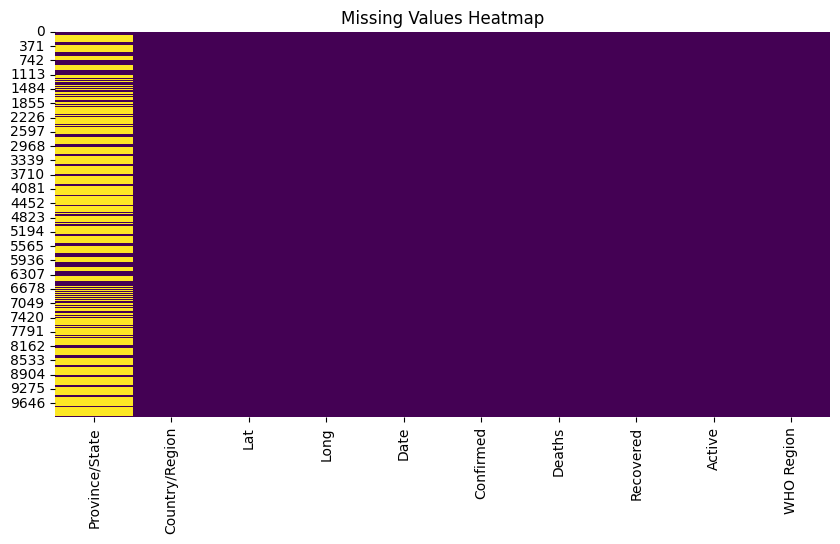

Imputation completed in 35.85 seconds
Models that failed: ['CalibratedClassifierCV: \nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n5 fits failed with the following error:\nTraceback (most recent call last):\n  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\n  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper\n    return fit_method(estimator, *args, **kwargs)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py", line 419, in fit\n    self.calibrated_classifiers_ = parallel(\n                                   ^^^^^^^^^\n  File "/usr/local/lib/

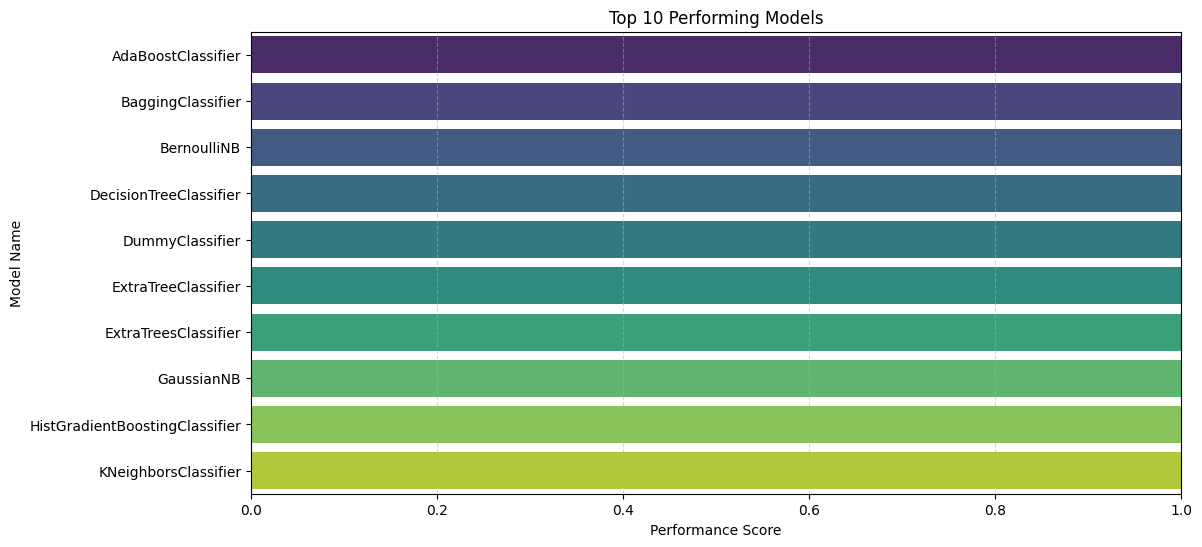

In [ ]:

import matplotlib.pyplot as plt
import importlib
from sklearn.utils.discovery import all_estimators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, r2_score
from scipy import stats
import time

import warnings
warnings.filterwarnings("ignore")

def load_dataset(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == ".csv":
        df = pd.read_csv(file_path)
        return df.head(10000)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please use CSV or Excel.")

def analyze_data(df):
    print("Dataset Overview:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nStatistical Summary:")
    print(df.describe())

    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()

def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=["number"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def impute_dataset(df):
    start_time = time.time()
    df_copy = df.copy()

    numerical_features = df_copy.select_dtypes(include='number').columns.tolist()
    categorical_features = df_copy.select_dtypes(include=['bool', 'category', 'object']).columns.tolist()

    ordinal_encoder = OrdinalEncoder()
    df_copy[categorical_features] = ordinal_encoder.fit_transform(df_copy[categorical_features])

    numeric_imputer = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
    categorical_imputer = IterativeImputer(RandomForestClassifier(), max_iter=10, random_state=0)

    transformer = ColumnTransformer(transformers=[
        ("num_imputer", numeric_imputer, numerical_features),
        ("cat_imputer", categorical_imputer, categorical_features)
    ])

    df_transformed = transformer.fit_transform(df_copy)
    df_transformed = pd.DataFrame(df_transformed, columns=numerical_features + categorical_features)
    df_transformed[categorical_features] = ordinal_encoder.inverse_transform(df_transformed[categorical_features])

    end_time = time.time()
    print(f"Imputation completed in {end_time - start_time:.2f} seconds")
    return df_transformed

def identify_problem_type(df, target_column):
    if df[target_column].nunique() <= 10:  # Assuming classification if target has few unique values
        return "classification"
    else:
        return "regression"

def evaluate_models(df, target_column):
    problem_type = identify_problem_type(df, target_column)
    estimators = all_estimators(type_filter="classifier" if problem_type == "classification" else "regressor")

    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Handle categorical variables properly
    X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Scale numerical features

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model_scores = []
    failed_models = []

    for name, ModelClass in estimators:
        try:
            model = ModelClass()
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy" if problem_type == "classification" else "r2")
            mean_score = np.mean(scores)

            model_scores.append((name, mean_score))
        except Exception as e:
            failed_models.append((name, str(e)))

    # Sort models by performance
    top_models = sorted(model_scores, key=lambda x: x[1], reverse=True)[:10]

    # Print failed models for debugging
    if failed_models:
        print("Models that failed:", [f"{name}: {error}" for name, error in failed_models])

    return pd.DataFrame(top_models, columns=["Model", "Score"])



def plot_top_models(top_models):
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Score", y="Model", data=top_models, palette="viridis", orient="h")
    plt.xlabel("Performance Score")
    plt.ylabel("Model Name")
    plt.title("Top 10 Performing Models")
    plt.xlim(0, 1)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.show()

# Pipeline Execution
file_path = "covid_19_clean_complete.csv"  # Change this to your dataset file

df = load_dataset(file_path)
analyze_data(df)
df = remove_outliers(df)
df = impute_dataset(df)
target_column = "Recovered"  # Change this to your actual target column

top_models = evaluate_models(df, target_column)
plot_top_models(top_models)

GPT code

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.discovery import all_estimators
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, classification_report
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df.head(10000)

def preprocess_data(df):
    df = df.dropna(axis=1, thresh=len(df) * 0.7)  # Drop columns with >30% missing values
    df = df.drop_duplicates()
    df = df.select_dtypes(include=['number'])  # Keep only numerical columns
    return df

def impute_dataset(df):
    imputer = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

def feature_selection(df, target_column):
    correlation_matrix = df.corr()
    highly_correlated = correlation_matrix[target_column].abs().sort_values(ascending=False)
    features = highly_correlated[highly_correlated > 0.05].index.tolist()
    return df[features]

def evaluate_models(df, target_column):
    problem_type = "classification" if df[target_column].nunique() <= 10 else "regression"
    estimators = all_estimators(type_filter="classifier" if problem_type == "classification" else "regressor")

    X = df.drop(columns=[target_column])
    y = df[target_column]

    X = StandardScaler().fit_transform(X)  # Scale features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_scores = []

    for name, ModelClass in estimators:
        try:
            model = ModelClass()
            param_grid = {"n_estimators": [50, 100]} if hasattr(model, "n_estimators") else {}
            clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy" if problem_type == "classification" else "r2")
            clf.fit(X_train, y_train)
            best_model = clf.best_estimator_
            score = best_model.score(X_test, y_test)
            model_scores.append((name, score))
        except:
            continue

    return pd.DataFrame(sorted(model_scores, key=lambda x: x[1], reverse=True)[:10], columns=["Model", "Score"])

# Pipeline Execution
file_path = "covid_19_clean_complete.csv"
df = load_dataset(file_path)
df = preprocess_data(df)
df = impute_dataset(df)
target_column = "Confirmed"
df = feature_selection(df, target_column)
top_models = evaluate_models(df, target_column)
print(top_models)


                         Model  Score
0                ARDRegression    1.0
1                BayesianRidge    1.0
2                         Lars    1.0
3                  LassoLarsCV    1.0
4                  LassoLarsIC    1.0
5             LinearRegression    1.0
6  OrthogonalMatchingPursuitCV    1.0
7   TransformedTargetRegressor    1.0
8   PassiveAggressiveRegressor    1.0
9                      RidgeCV    1.0


Usman's code

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
Model : AdaBoostClassifier, Score : 0.985
Model : BaggingClassifier, Score : 0.98
Model : BernoulliNB, Score : 0.985
Model : CalibratedClassifierCV, Score : 0.985
Negative values in data passed to CategoricalNB (input X).
ClassifierChain.__init__() missing 1 required positional argument: 'base_estimator'
Negative values in data passed to ComplementNB (input X).
Model : DecisionTreeClassifier, Score : 0.985
Model : DummyClassifier, Score : 0.985
Model : ExtraTreeClassifier, Score : 0.985
Model : ExtraTreesClassifier, Score : 0.985
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'
Model : GaussianNB, Score : 0.99
Model : GaussianProcessClassifier, Score : 0.97
Model : GradientBoostingClassifier, Score : 0.98
Model : HistGradientBoostingClassifier, Score : 0.99
Model : KNeighborsClassifier, Score :

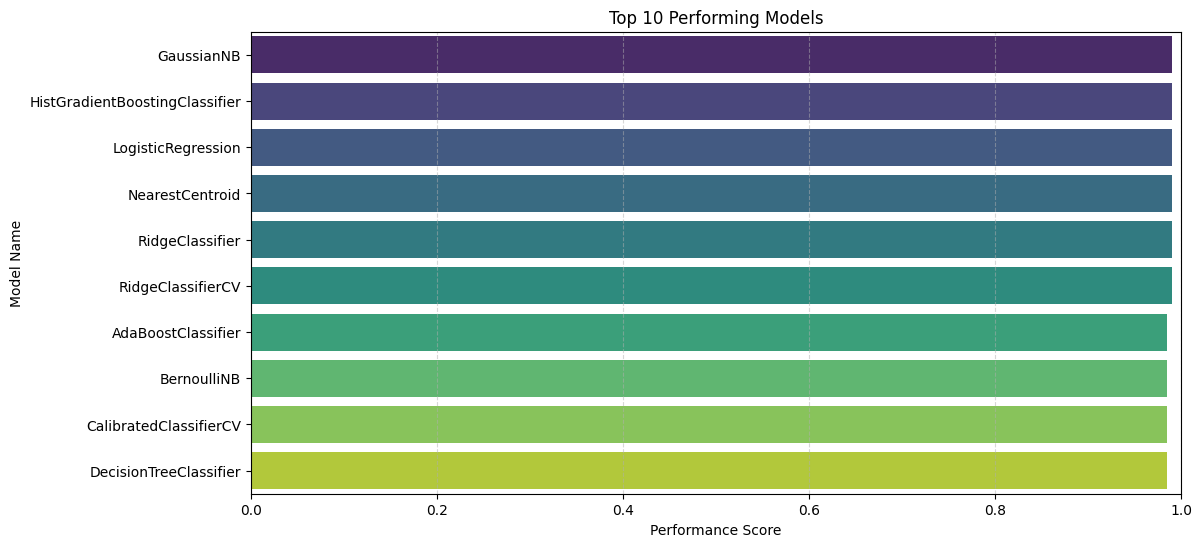

                            Model  Score
0                      GaussianNB  0.990
1  HistGradientBoostingClassifier  0.990
2              LogisticRegression  0.990
3                 NearestCentroid  0.990
4                 RidgeClassifier  0.990
5               RidgeClassifierCV  0.990
6              AdaBoostClassifier  0.985
7                     BernoulliNB  0.985
8          CalibratedClassifierCV  0.985
9          DecisionTreeClassifier  0.985


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from sklearn.utils.discovery import all_estimators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, r2_score
from scipy import stats
import time

import warnings
warnings.filterwarnings("ignore")

def load_dataset(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == ".csv":
        df = pd.read_csv(file_path)
        return df.head(1000)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please use CSV or Excel.")

def analyze_data(df):
    print("Dataset Overview:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nStatistical Summary:")
    print(df.describe())

    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()

def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=["number"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def impute_dataset(df):
    start_time = time.time()
    df_copy = df.copy()

    numerical_features = df_copy.select_dtypes(include='number').columns.tolist()
    categorical_features = df_copy.select_dtypes(include=['bool', 'category', 'object']).columns.tolist()

    ordinal_encoder = OrdinalEncoder()
    df_copy[categorical_features] = ordinal_encoder.fit_transform(df_copy[categorical_features])

    numeric_imputer = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
    categorical_imputer = IterativeImputer(RandomForestClassifier(), max_iter=10, random_state=0)

    transformer = ColumnTransformer(transformers=[
        ("num_imputer", numeric_imputer, numerical_features),
        ("cat_imputer", categorical_imputer, categorical_features)
    ])

    df_transformed = transformer.fit_transform(df_copy)
    df_transformed = pd.DataFrame(df_transformed, columns=numerical_features + categorical_features)
    df_transformed[categorical_features] = ordinal_encoder.inverse_transform(df_transformed[categorical_features])

    end_time = time.time()
    print(f"Imputation completed in {end_time - start_time:.2f} seconds")
    return df_transformed

def identify_problem_type(df, target_column):
    if df[target_column].nunique() <= 10:  # Assuming classification if target has few unique values
        return "classification"
    else:
        return "regression"

def evaluate_models(df, target_column):
    problem_type = identify_problem_type(df, target_column)
    estimators = all_estimators(type_filter="classifier" if problem_type == "classification" else "regressor")

    #Making df small
    df = df[:1000]
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Handle categorical variables properly
    X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Scale numerical features

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model_scores = []
    failed_models = []

    for name, ModelClass in estimators:
        try:
            model = ModelClass()
            model.fit(X_train,y_train)
            score = model.score(X_test,y_test)

            print(f"Model : {name}, Score : {score}")
            model_scores.append((name, score))
        except Exception as e:
            print(e)
            failed_models.append((name, str(e)))

    # Sort models by performance
    top_models = sorted(model_scores, key=lambda x: x[1], reverse=True)[:10]

    # Print failed models for debugging
    # if failed_models:
    #     print("Models that failed:", [f"{name}: {error}" for name, error in failed_models])
    return pd.DataFrame(top_models, columns=["Model", "Score"])


def plot_top_models(top_models):
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Score", y="Model", data=top_models, palette="viridis", orient="h")
    plt.xlabel("Performance Score")
    plt.ylabel("Model Name")
    plt.title("Top 10 Performing Models")
    plt.xlim(0, 1)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.show()

# Pipeline Execution
file_path = "covid_19_clean_complete.csv"  # Change this to your dataset file

# Load the dataset correctly
data = load_dataset(file_path)

# Check the columns to find the target column
print(data.columns)

# Ensure that the target column name is correct (adjust as needed)
target_column = "Recovered"  # Replace with the correct target column name from your dataset

# Evaluate the models
top_models = evaluate_models(data, target_column)

# Plot the top models
plot_top_models(top_models)
print(top_models)

new code

Starting Machine Learning Pipeline

1. Loading dataset...
Dataset loaded successfully with shape: (1000, 10)

2. Dataset Overview:

First few rows:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Data Info:
<class 'pandas.core.frame.DataFrame'>
Ran

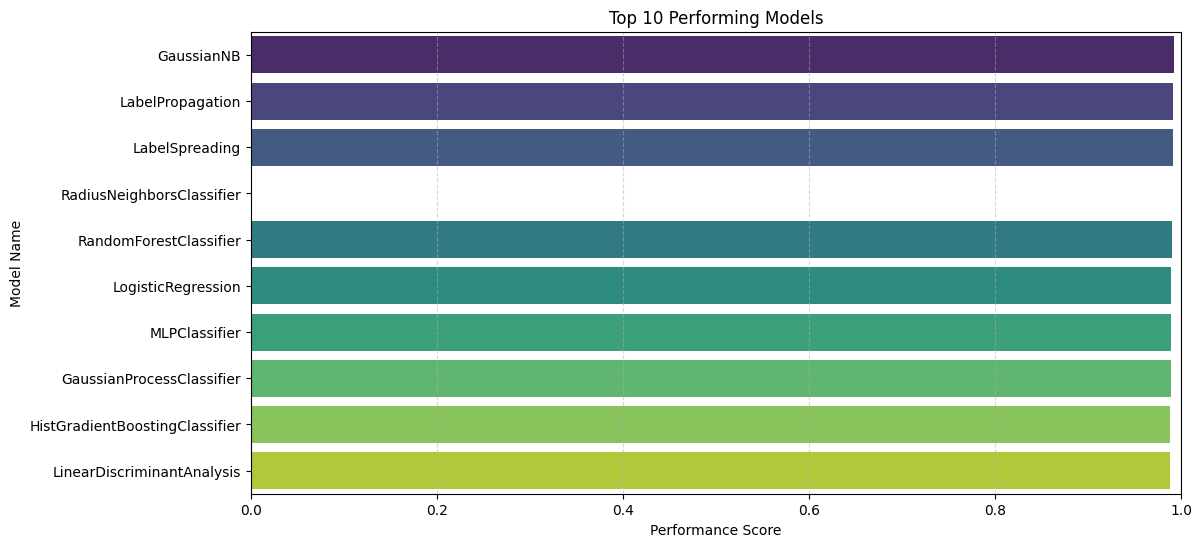


6. Training and tuning best model...
Best performing model: GaussianNB
No predefined hyperparameters for this model, using default parameters.

Model Performance:
R2 Score: 0.9865
RMSE: 0.2550
MAE: 0.0250

7. Generating predictions plot...


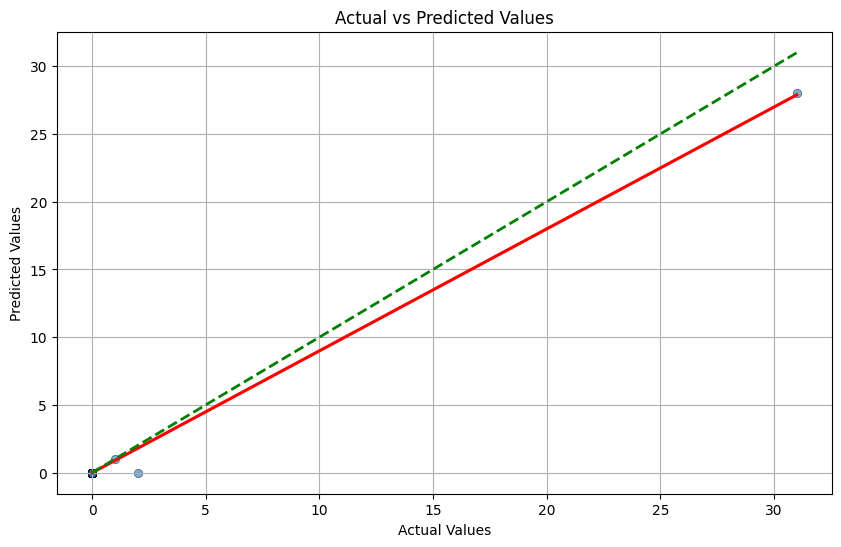

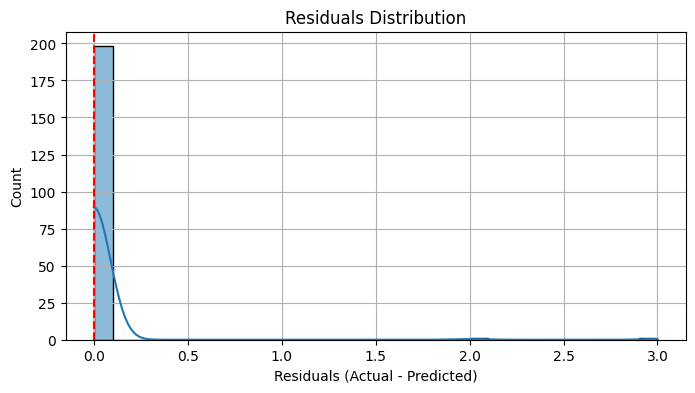

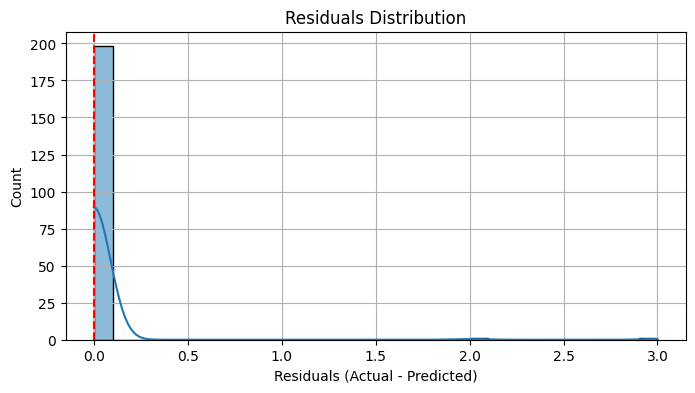


Pipeline completed successfully!

You can now use 'best_model' to make predictions on new data
Example usage:
new_predictions = best_model.predict(new_data)


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from sklearn.utils.discovery import all_estimators
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
import time
import warnings

warnings.filterwarnings("ignore")

# ---------------------- Data Loading ----------------------
def load_dataset(file_path):
    """Loads a dataset from CSV or Excel and returns the first 1000 rows."""
    ext = os.path.splitext(file_path)[1].lower()
    if ext == ".csv":
        return pd.read_csv(file_path).head(1000)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(file_path).head(1000)
    else:
        raise ValueError("Unsupported file format. Please use CSV or Excel.")

# ---------------------- Data Analysis ----------------------
def analyze_data(df):
    """Displays an overview of the dataset, missing values, and basic statistics."""
    print("\n=== Dataset Overview ===")
    print(df.info())
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    print("\n=== Statistical Summary ===")
    print(df.describe())

    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()

# ---------------------- Outlier Removal ----------------------
def remove_outliers(df):
    """Removes outliers using the IQR method for numeric columns."""
    numeric_cols = df.select_dtypes(include=["number"]).columns
    for col in numeric_cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# ---------------------- Missing Value Imputation ----------------------
def impute_dataset(df):
    """Imputes missing values using Iterative Imputer (RandomForest)."""
    start_time = time.time()
    df_copy = df.copy()

    # Separating numeric and categorical features
    numerical_features = df_copy.select_dtypes(include='number').columns.tolist()
    categorical_features = df_copy.select_dtypes(include=['bool', 'category', 'object']).columns.tolist()

    # Encoding categorical features
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    transformed_cats = encoder.fit_transform(df_copy[categorical_features])
    cat_columns = encoder.get_feature_names_out(categorical_features)

    df_copy.drop(columns=categorical_features, inplace=True)
    df_copy[cat_columns] = transformed_cats

    # Impute missing values in numeric features
    numeric_imputer = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
    transformer = ColumnTransformer(transformers=[("num_imputer", numeric_imputer, numerical_features)], remainder='passthrough')

    df_transformed = transformer.fit_transform(df_copy)
    df_transformed = pd.DataFrame(df_transformed, columns=numerical_features + list(cat_columns))

    print(f"\nImputation completed in {time.time() - start_time:.2f} seconds")
    return df_transformed

# ---------------------- Problem Type Identification ----------------------
def identify_problem_type(df, target_column):
    """Determines whether the problem is classification or regression based on target column."""
    return "classification" if df[target_column].nunique() <= 10 else "regression"

# ---------------------- Model Evaluation ----------------------
def evaluate_models(df, target_column):
    """Evaluates models and returns top 10 based on cross-validation scores."""
    problem_type = identify_problem_type(df, target_column)
    estimators = all_estimators(type_filter="classifier" if problem_type == "classification" else "regressor")

    X, y = df.drop(columns=[target_column]), df[target_column]
    X = pd.get_dummies(X, drop_first=True)
    X_scaled = StandardScaler().fit_transform(X)

    model_scores, failed_models = [], []

    print("\nEvaluating models...")
    for name, ModelClass in estimators:
        try:
            model = ModelClass()
            scores = cross_val_score(model, X_scaled, y, cv=5)
            mean_score = np.mean(scores)
            print(f"✔ {name}: Score = {mean_score:.4f}")
            model_scores.append((name, mean_score))
        except Exception as e:
            failed_models.append(name)

    print(f"\n{len(failed_models)} models failed to evaluate.")
    return pd.DataFrame(sorted(model_scores, key=lambda x: x[1], reverse=True)[:10], columns=["Model", "Score"])

# ---------------------- Plotting Top Models ----------------------
def plot_top_models(top_models):
    """Plots top 10 models based on evaluation scores."""
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Score", y="Model", data=top_models, palette="viridis", orient="h")
    plt.xlabel("Performance Score")
    plt.ylabel("Model Name")
    plt.title("Top 10 Performing Models")
    plt.xlim(0, 1)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.show()


#-------------------------TRAINING BEST MODELS----------------------
def train_best_model(df, target_column, top_models):
    """
    Train and tune the best performing model from the evaluation results.

    Parameters:
    df: pandas DataFrame containing the dataset
    target_column: string, name of the target variable
    top_models: DataFrame containing model evaluation results

    Returns:
    tuple containing (best_model, X_test, y_test, predictions, scores)
    """
    try:
        # Get the best model name
        best_model_name = top_models.iloc[0]['Model']
        print(f"Best performing model: {best_model_name}")

        # Prepare the data
        X = df.drop(columns=[target_column])
        y = df[target_column]

        # Handle categorical variables
        X = pd.get_dummies(X, drop_first=True)

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )

        # Initialize the best model
        model_dict = dict(all_estimators())
        if best_model_name not in model_dict:
            raise ValueError(f"Model {best_model_name} not found in all_estimators().")

        ModelClass = model_dict[best_model_name]
        model = ModelClass()

        # Define hyperparameter grid based on model type
        param_grid = {}
        if hasattr(model, 'n_estimators'):  # For ensemble methods (e.g., RandomForest)
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        elif hasattr(model, 'C'):  # For SVM, LogisticRegression, etc.
            param_grid = {
                'C': [0.1, 1, 10, 100],
                'tol': [1e-4, 1e-3, 1e-2],
            }
        elif hasattr(model, 'max_iter'):  # For iterative models like LogisticRegression
            param_grid = {
                'max_iter': [100, 200, 300],
                'tol': [1e-4, 1e-3, 1e-2],
            }

        # Perform hyperparameter tuning if grid is not empty
        if param_grid:
            print("Starting hyperparameter tuning...")
            random_search = RandomizedSearchCV(
                model,
                param_distributions=param_grid,
                n_iter=10,
                cv=5,
                random_state=42,
                n_jobs=-1
            )
            random_search.fit(X_train, y_train)
            best_model = random_search.best_estimator_
            print("\nBest parameters:", random_search.best_params_)
        else:
            print("No predefined hyperparameters for this model, using default parameters.")
            best_model = model
            best_model.fit(X_train, y_train)

        # Make predictions
        predictions = best_model.predict(X_test)

        # Calculate performance metrics
        scores = {
            'R2 Score': r2_score(y_test, predictions),
            'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
            'MAE': np.mean(np.abs(y_test - predictions))
        }

        print("\nModel Performance:")
        for metric, value in scores.items():
            print(f"{metric}: {value:.4f}")

        return best_model, X_test, y_test, predictions, scores

    except Exception as e:
        print("\nError during training:", str(e))
        return None, None, None, None, None


# def plot_predictions(y_test, predictions):
#     """
#     Create a scatter plot of actual vs predicted values
#     """
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_test, predictions, alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.title('Actual vs Predicted Values')
#     plt.tight_layout()
#     plt.show()

# second code
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def plot_predictions(y_test, predictions):
    """
    Create a scatter plot of actual vs predicted values with improved visualization.
    Handles cases where predictions are empty.
    """
    if y_test is None or predictions is None or len(y_test) == 0 or len(predictions) == 0:
        print("Error: y_test or predictions is empty. Cannot plot.")
        return

    y_test = np.array(y_test)
    predictions = np.array(predictions)

    plt.figure(figsize=(10, 6))

    # Scatter plot for actual vs predicted values
    sns.scatterplot(x=y_test, y=predictions, alpha=0.6, edgecolor='k')

    # Add a regression line
    if len(y_test) > 1 and len(predictions) > 1:  # Only plot regression line if there are multiple points
        sns.regplot(x=y_test, y=predictions, scatter=False, color='red', ci=None)

    # Plot a perfect prediction line (y = x)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g--', lw=2)

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

    # Residuals Histogram
    residuals = y_test - predictions
    plt.figure(figsize=(8, 4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.title('Residuals Distribution')
    plt.grid(True)
    plt.show()


    # Residuals Histogram
    residuals = y_test - predictions
    plt.figure(figsize=(8, 4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.title('Residuals Distribution')
    plt.grid(True)
    plt.show()


#--------------------MAIN----------------------
def main():
    """
    Main function to execute the complete machine learning pipeline
    """
    # 1. Set up parameters
    file_path = "covid_19_clean_complete.csv"  # Change this to your dataset path
    target_column = "Recovered"  # Change this to your target column

    print("="*50)
    print("Starting Machine Learning Pipeline")
    print("="*50)

    try:
        # 2. Load the data
        print("\n1. Loading dataset...")
        data = load_dataset(file_path)
        print(f"Dataset loaded successfully with shape: {data.shape}")

        # 3. Basic data overview
        print("\n2. Dataset Overview:")
        print("\nFirst few rows:")
        print(data.head())
        print("\nData Info:")
        print(data.info())
        print("\nMissing Values:")
        print(data.isnull().sum())

        # 4. Handle missing values if any
        if data.isnull().sum().sum() > 0:
            print("\n3. Imputing missing values...")
            data = impute_dataset(data)
            print("Imputation completed")

        # 5. Evaluate models
        print("\n4. Evaluating different models...")
        top_models = evaluate_models(data, target_column)
        print("\nTop 10 Models Performance:")
        print(top_models)

        # 6. Plot model comparison
        print("\n5. Generating model comparison plot...")
        plot_top_models(top_models)

        # 7. Train best model
        print("\n6. Training and tuning best model...")
        best_model, X_test, y_test, predictions, scores = train_best_model(
            data, target_column, top_models
        )

        # 8. Plot predictions
        print("\n7. Generating predictions plot...")
        plot_predictions(y_test, predictions)

        # 9. Save the model (optional)
        # If you want to save the model, uncomment these lines:
        # import joblib
        # joblib.dump(best_model, 'best_model.joblib')
        # print("\nModel saved as 'best_model.joblib'")

        print("\n" + "="*50)
        print("Pipeline completed successfully!")
        print("="*50)

        return best_model, data, scores

    except Exception as e:
        print(f"\nError occurred: {str(e)}")
        raise

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)

    # Execute the pipeline
    best_model, data, scores = main()

    # The model, data, and scores are now available for further use
    print("\nYou can now use 'best_model' to make predictions on new data")
    print("Example usage:")
    print("new_predictions = best_model.predict(new_data)")